<a href="https://colab.research.google.com/github/Je0azul5/AI-ML/blob/main/Sudoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#se importan las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import imageio
import random
import math
import copy
import sys

Primer Punto:
Desarrollar un programa en Python que solucione el siguiente sudoku de 6x6 utilizando el algoritmo de hill climbing
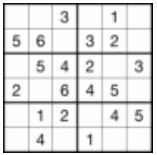


In [40]:
class Sudoku():

	def __init__(self):
		self.reset()
	
  #Funcion la cual creara las posiciones del sudoku inicial    
	def reset(self):
		self.tablero = (np.indices((6,6)) + 1)[1]
		for i in range(len(self.tablero)):
			self.tablero[i] = np.random.permutation(self.tablero[i])
		self.valorArreglo = np.array([
	#(valor, fila, columna)
			(3, 0, 2),
			(6, 1, 1),
			(5, 1, 0),
			(1, 0, 4),
			(2, 1, 4),
			(3, 1, 3),
			(2, 3, 0),
			(5, 2, 1),
			(4, 2, 2),
			(6, 3, 2),
			(2, 2, 3),
			(3, 2, 5),
			(4, 3, 3),
			(5, 3, 4),
			(1, 4, 1),
			(2, 4, 2),
			(4, 5, 1),   
      (4, 4, 4),
			(5, 4, 5),
			(1, 5, 3)
			])

		self.setup()
  
	#Imprime el tablero del sudoku
	def pintar(self, tablero=[]):
		if (len(tablero)==0):
			tablero = self.tablero
		
		for i in range(len(tablero)):
			if (i % 2 == 0 and i != 0):
				print("------+------")
			for j in range(len(tablero[i])):
				if (j % 3 == 0 and j != 0):
					sys.stdout.write("|")
				sys.stdout.write(str(tablero[i][j]) + " ")

			print("")
	
	#Organiza el Sudoku para poder ser visualizado
	def cambiarLugar(self, val, line, col):
		valIndex = np.where(self.tablero[line]==val)[0][0]
		#print('CambiarLugar',self.tablero[line])
		self.cambiar(self.tablero[line], valIndex, col)

	#La funcion setup() recorre el Arreglo ValorArreglo y asigna los valores a las variables val, fila,col
	def setup(self):
		for (val, fila, col) in self.valorArreglo:
			self.cambiarLugar(val, fila, col)
	#Funcion fitnees, devuelve el fitness de cada linea
	def fitness(self, tablero=[]):
		if (len(tablero) == 0):
			tablero = self.tablero
		score = 0
		filas, cols = tablero.shape
		for fila in tablero:
			score += len(np.unique(fila))
		for col in tablero.T:
			score += len(np.unique(col))
		for i in range(0, 2):
		  for j in range(0, 3):
		    sub = tablero[2*i:2*i+2, 3*j:3*j+3]
		    score += len(np.unique(sub))
		return score

	#Cambia la posicion dada previamente, por la correcta
	def cambiar(self, arr, pos1, pos2):
		arr[pos1], arr[pos2] = arr[pos2], arr[pos1]

	#Evalua fila y colummna para que no se repita
	def isFixed(self, fila, col):
		for t in self.valorArreglo:
			if(fila == t[1] and col == t[2]):
				return True
		return False


	#Elije la mejor solucion de la fila 
	def mejorLado(self):
		temptablero = self.tablero.copy()
		# best = (fila, (col1, col2), val)
		best = (0, (0,0), -1)
		for i in range(len(temptablero)):
			for j in range(len(temptablero[i])):
				for k in range(i,len(temptablero)):
					if (self.isFixed(i,j) or self.isFixed(i,k)):
						continue
					self.cambiar(temptablero[i], j, k)
					contestant = (i, (j,k), self.fitness(temptablero))
					if(contestant[2] > best[2]):
						best = contestant
					
					self.cambiar(temptablero[i], j, k)
		return best
	#Algoritmo a ejecutar 
	def climbHill(self):
		scores = []
		maxScore = self.fitness()
		# print("Initial score: " + str(maxScore))
		while True:
			# print("Current score: " + str(maxScore))
			scores.append(maxScore)
			(fila, (col1, col2), nextScore) = self.mejorLado()
			if (nextScore <= maxScore):
				return scores
			self.cambiar(self.tablero[fila], col1, col2)
			maxScore = nextScore


In [41]:
sud = Sudoku()
print("Sudoku 6x6")
trials = []
maxScore = -1
bestTablero = []
for i in range(7):
	sud.reset()
	finalScore = sud.climbHill()
	maxFinalScore = max(finalScore)
	if(maxScore < maxFinalScore):
		maxScore = maxFinalScore
		bestTablero = sud.tablero.copy()
	#print(str(i) + ") " + str(finalScore[-1]))

	trials.append(finalScore)
	# print(finalScore)
#print("mejor puntuación: %i" % maxScore)
sud.pintar(bestTablero)


Sudoku 6x6
4 2 3 |5 1 6 
5 6 1 |3 2 4 
------+------
1 5 4 |2 6 3 
2 3 6 |4 5 1 
------+------
3 1 2 |6 4 5 
6 4 5 |1 3 2 


Segundo punto: Resuelva el sudoku utilizando simulated annealing 

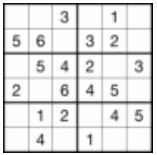

Utilice diferentes funciones de temperatura (mínimo 3). Varíe los parámetros de
temperatura inicial y factor de enfriamiento. 

Grafique y analice cada uno de los versiones desarrolladas

In [42]:
class Sudoku():

    def __init__(self, input = None):
        if input is None:
            self.input = np.full((6,6), 0)
        else:
            self.input = input

        self.llenar_random()


    def __str__(self):
        return str(self.output)

    #llena el tablero inicial 
    def llenar_random(self):
        self.output = self.input.copy()
        for i in range(6):
            llenar = set((1,2,3,4,5,6)).difference(set(self.output[i,:]))
            for j in range(6):
                if self.output[i,j] == 0:
                    self.output[i,j] = llenar.pop()

    #se cambia la posicion  
    def cambiar(self, x, y):
        return self.input[x][y] == 0
    
    #se obtiene las filas del tablero
    def obtener_filas(self):
        tablero = self.output.copy()
        return [list(tablero[i,:]) for i in range(6)]
    
    #se obtiene las columnas del tablero
    def obtener_columnas(self):
        tablero = self.output.copy()
        return [list(tablero[:,i]) for i in range(6)]

    #se obtiene los cuadrantes del tablero
    def obtener_cuadrado(self):
        tablero = self.output.copy()
        cuadradito = [[] for i in range(6)]
        for i in range(6):
            for j in range(6):
                cuadradito[i//3 + (j//3)*3].append(tablero[i][j])
        return cuadradito

#se calcula la energia
def obtener_energia(sudoku):
    sub_val = 1
    add_val = 1
    energia = 0

    for i in [sudoku.obtener_columnas(), sudoku.obtener_cuadrado()]:
        for tmp in i:
            energia = energia + add_val * (6 - len(set(tmp)))
    return energia

#se calcula los valores a cambiar en el tablero para que no haya repeticion en fila columna 
def siguiente_val(sudoku):
    sudoku = copy.deepcopy(sudoku)
    
    while True:
        fila = random.randrange(0,6)
        for i in range(4):
            x1 = random.randrange(0,6)
            x2 = random.randrange(0,6)            
            if sudoku.cambiar(fila, x1) and sudoku.cambiar(fila, x2):
                sudoku.output[fila][x1], sudoku.output[fila][x2] = sudoku.output[fila][x2], sudoku.output[fila][x1]
                return sudoku


In [43]:
def probabilidad_aceptada(energia_actual, nueva_energia, T):
    if nueva_energia < energia_actual:
        return 1.0
    return math.exp((energia_actual - nueva_energia) / T)

#función algoritmo simulated_annealing en la cual ingresa el tablero inicial y los parametros iniciales
def simulated_annealing(tablero, E, siguiente, n, m, T, factor_enfriamiento):
    #se realiza una copia del tablero
    tablero = copy.deepcopy(tablero)
    it=0

    #Evalua si la probabilidad es aceptada
    for i in range(n):
        for j in range(m):
            tablero_nuevo = siguiente(tablero)
            energia_actual = E(tablero)
            nueva_energia = E(tablero_nuevo)

            if probabilidad_aceptada(energia_actual, nueva_energia, T) > random.random():
                tablero = tablero_nuevo
                if nueva_energia == 0:
                
                    return tablero
                it=i
    
        #se define la función de temperatura
        T = T - T * factor_enfriamiento
    print(" ")
    print("la solucion fue encontrada en: ", it, "iteraciones")
    print(" ")
    return tablero


In [44]:
#se crea el tablero inicial
tablero = np.array([ [0,0,3,0,1,0],
                      [5,6,0,3,2,0],
                      [0,5,4,2,0,3],
                      [2,0,6,4,5,0],
                      [0,1,2,0,4,5],
                      [0,4,0,1,0,0]])

sudoku = Sudoku(tablero)
print(sudoku.input)

#solución 1
#se dan los valores iniciales
print("Solución 1")
sudoku = simulated_annealing(
        sudoku, 
        obtener_energia, 
        siguiente_val, 
        n=50, 
        m=10, 
        T=10, 
        factor_enfriamiento=0.1)

#se imprime el tablero final
print(sudoku)
print(" ")
print("Energia final: ", obtener_energia(sudoku))


[[0 0 3 0 1 0]
 [5 6 0 3 2 0]
 [0 5 4 2 0 3]
 [2 0 6 4 5 0]
 [0 1 2 0 4 5]
 [0 4 0 1 0 0]]
Solución 1
 
la solucion fue encontrada en:  49 iteraciones
 
[[4 2 3 5 1 6]
 [5 6 1 3 2 4]
 [1 5 4 2 6 3]
 [2 3 6 4 5 1]
 [3 1 2 6 4 5]
 [6 4 5 1 3 2]]
 
Energia final:  12


In [45]:
#se crea el tablero inicial
tablero = np.array([ [0,0,3,0,1,0],
                      [5,6,0,3,2,0],
                      [0,5,4,2,0,3],
                      [2,0,6,4,5,0],
                      [0,1,2,0,4,5],
                      [0,4,0,1,0,0]])

sudoku = Sudoku(tablero)
print(sudoku.input)

#solución 2
#se dan los valores iniciales
print("Solución 2")
sudoku = simulated_annealing(
        sudoku, 
        obtener_energia, 
        siguiente_val, 
        n=100, 
        m=20, 
        T=40, 
        factor_enfriamiento=0.2)

#se imprime el tablero final
print(sudoku)
print(" ")
print("Energia final: ", obtener_energia(sudoku))

[[0 0 3 0 1 0]
 [5 6 0 3 2 0]
 [0 5 4 2 0 3]
 [2 0 6 4 5 0]
 [0 1 2 0 4 5]
 [0 4 0 1 0 0]]
Solución 2
 
la solucion fue encontrada en:  99 iteraciones
 
[[4 2 3 5 1 6]
 [5 6 1 3 2 4]
 [1 5 4 2 6 3]
 [2 3 6 4 5 1]
 [3 1 2 6 4 5]
 [6 4 5 1 3 2]]
 
Energia final:  12


In [46]:
#se crea el tablero inicial
tablero = np.array([ [0,0,3,0,1,0],
                      [5,6,0,3,2,0],
                      [0,5,4,2,0,3],
                      [2,0,6,4,5,0],
                      [0,1,2,0,4,5],
                      [0,4,0,1,0,0]])

sudoku = Sudoku(tablero)
print(sudoku.input)

#solución 3
#se dan los valores iniciales
print("Solución 3")
sudoku = simulated_annealing(
        sudoku, 
        obtener_energia, 
        siguiente_val, 
        n=60, 
        m=50, 
        T=1, 
        factor_enfriamiento=0.00001)

#se imprime el tablero final
print(sudoku)
print(" ")
print("Energia final: ", obtener_energia(sudoku))

[[0 0 3 0 1 0]
 [5 6 0 3 2 0]
 [0 5 4 2 0 3]
 [2 0 6 4 5 0]
 [0 1 2 0 4 5]
 [0 4 0 1 0 0]]
Solución 3
 
la solucion fue encontrada en:  59 iteraciones
 
[[4 2 3 5 1 6]
 [5 6 1 3 2 4]
 [1 5 4 2 6 3]
 [2 3 6 4 5 1]
 [3 1 2 6 4 5]
 [5 4 6 1 2 3]]
 
Energia final:  16
